Autoregressive Integrated Moving Average

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [5]:
df = pd.read_csv('../../Datasets/finalized/features_all_data.csv')

df_labels = pd.read_csv('../../Datasets/finalized/label_crime_bygroup.csv')

#merge labels with features
df = df.merge(df_labels, on=['NeighbourhoodCode', 'Year', 'Month'], how='left')

df.drop(['NeighbourhoodCode', 'Year'], axis=1, inplace=True)

X = df.drop('Property', axis=1)
y = df['Property']

c:\Users\meeh\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:               Property   No. Observations:                 7392
Model:                 ARIMA(1, 3, 2)   Log Likelihood              -23277.268
Date:                Thu, 15 Jun 2023   AIC                          46562.537
Time:                        17:10:31   BIC                          46590.168
Sample:                             0   HQIC                         46572.032
                               - 7392                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3876      0.004   -104.941      0.000      -0.395      -0.380
ma.L1         -1.9865      0.002   -912.340      0.000      -1.991      -1.982
ma.L2          0.9894      0.002    452.735      0.0

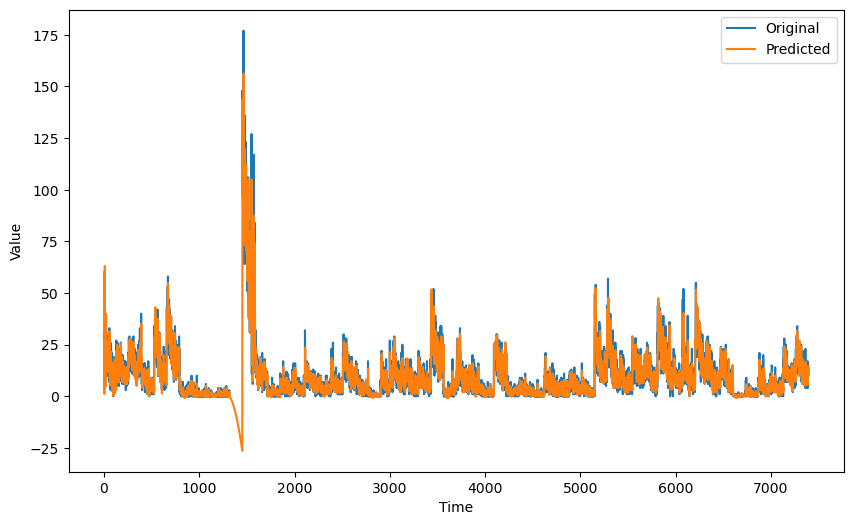

In [6]:


# Assuming your time series data is stored in a DataFrame called 'df' with the time series in a column labeled as 'value'

# Convert the 'value' column to a time series
ts = pd.Series(df['Property'])

# Define the order (p, d, q) for the ARIMA model
p = 1  # Autoregressive order
d = 3  # Differencing order
q = 2  # Moving average order

# Create an ARIMA model
model = ARIMA(ts, order=(p, d, q))

# Fit the model to the data
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())

# Make predictions on the data
predictions = model_fit.predict(start=1, end=len(ts), typ='levels')

# Plot the original time series and the predicted values
plt.figure(figsize=(10, 6))
plt.plot(ts, label='Original')
plt.plot(predictions, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [7]:
model_fit.save('../../FinalDeliverable/app_data/artifacts/model_main.pkl')
